In [ ]:
from scipy.fft import fft, ifft, fftshift, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def Fourier_n(u, Omega,n):
    u_hat = (1j*Omega)**n*fft(u)
    u_hat = ifft(u_hat)
    return np.real(u_hat)

def second_order_solve(u0, u1, dt, t_end, Omega):
    n_iter = int(t_end/dt)
    uk = np.zeros((2, len(u0)))
    uk[0] = u0
    uk[1] = u1
    
    for i in range(n_iter):
        u_hat = (1j*Omega)**2*fft(uk[1])
        u_fourier = np.real(ifft(u_hat))
        
        uk_new = 2*uk[1] - uk[0] + dt**2*u_fourier
        uk[0] = uk[1]
        uk[1] = uk_new
    
    return uk_new, n_iter*dt


0.05106077674928944
0.005373683699521292
0.002694181146407404
0.001348923721381623
0.0006749199402055206
0.0003375744639391165


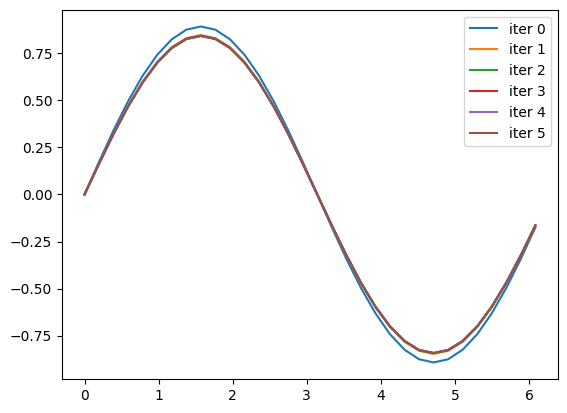

In [33]:
N_list = [16,32,64,128,256]
dt_list = [0.1,0.01,0.005,0.0025,0.00125,0.000625]
error = np.zeros(len(dt_list))
fig,ax = plt.subplots()

for index, dt in enumerate(dt_list):
    N = 32
    L = 2*np.pi
    x = np.linspace(0, L, N, endpoint=False)
    # dt = 0.0001
    t_end = 1
    n = fftfreq(N)*N
    scale = 2*np.pi/L
    Omega = n*scale

    u0 = np.zeros(N)
    u1 = np.sin(x)*dt
  
    u,t_num= second_order_solve(u0=u0, u1=u1, dt=dt, t_end=t_end, Omega=Omega)
    
    ax.plot(x,u,label=f'iter {index}')
    ax.legend()
    print(np.abs(u-np.sin(x)*np.sin(t_num)).max())
    error[index] = np.abs(u-np.sin(x)*np.sin(t_num)).max()

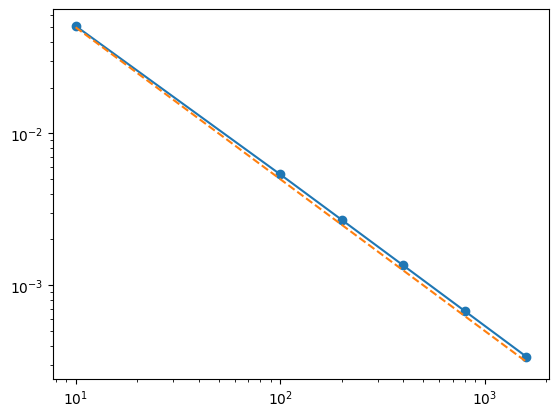

In [41]:
# fig, ax = plt.subplots()
# ax.plot(1/dt_list, error, marker='o')
# ax.plot(1/dt_list, 0.5*dt_list, label=r'$\mathcal{O}(\Delta t^2)$', linestyle='--')
# ax.set_yscale('log')
# ax.set_xscale('log')
fig,ax = plt.subplots()
ax.plot(1/np.array(dt_list), error, marker='o')
ax.plot(1/np.array(dt_list), 0.5*np.array(dt_list), label=r'$\mathcal{O}(\Delta t^2)$', linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')